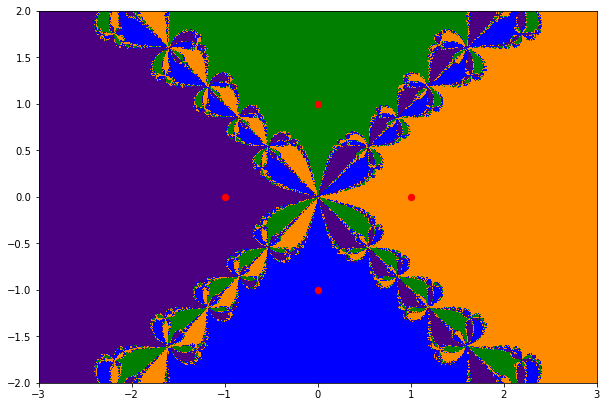

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ['indigo', 'b', 'darkorange', 'g']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
   
    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
   
    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
      
        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        cmap = 'hsv'
    else:
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower', extent = domain)
    plt.rcParams["figure.figsize"] = (10, 10)
    roots_given = [1, -1, 1*1j, -1*1j]
    x = [ele.real for ele in roots_given]
    y = [ele.imag for ele in roots_given]
    plt.scatter(x, y, color = 'r', s = 40)
    plt.show()

f = lambda z: z**4 - 1
fprime = lambda z: 4*z**3

plot_newton_fractal(f, fprime, n=500, domain=(-3, 3, -2, 2))